In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# aha manually reading each csv
df_budget = pd.read_csv("DATA/Budget_balance.csv")
df_burea = pd.read_csv("DATA/Bureaucracy_Quality.csv")
df_CAXGS = pd.read_csv("DATA/CAXGS.csv")
df_comp = pd.read_csv("DATA/Composite.csv")
df_corrup = pd.read_csv("DATA/Corruption.csv")
df_curr_ac = pd.read_csv("DATA/Current_account.csv")
df_debt = pd.read_csv("DATA/Debt_service_risk.csv")
df_demo_ac = pd.read_csv("DATA/Democratic_accountability.csv")
df_ethnic = pd.read_csv("DATA/Ethnic_tension.csv")
df_exch_rat = pd.read_csv("DATA/Exchange_Rate_Stability.csv")
df_external_conf = pd.read_csv("DATA/External_Conflict.csv")
df_for_debt = pd.read_csv("DATA/Foreign_Debt.csv")
# df_gdp_per_cap = pd.read_csv("DATA/GDP_per_capita.csv") # excluding these since we can just get raw gdp
# df_gdp_growth = pd.read_csv("DATA/GDPGrowth.csv") 
df_inflation = pd.read_csv("DATA/Inflation.csv")
df_int_liq = pd.read_csv("DATA/International_Liquidity.csv")
df_law_ord = pd.read_csv("DATA/Law_and_order.csv")
df_mil_pol = pd.read_csv("DATA/Military_in_politics.csv")
df_reli_tension = pd.read_csv("DATA/Religious_tensions.csv")
df_GDP = pd.read_csv("DATA/GDP_data.csv")

In [3]:
all_df = [df_budget, df_burea, df_CAXGS, df_comp, df_corrup, df_curr_ac, df_debt, df_demo_ac, df_ethnic,
          df_exch_rat, df_external_conf, df_inflation, df_int_liq, df_law_ord, df_mil_pol, df_reli_tension,
          df_GDP]
features = ["Budget_Balanace", "Bureaucracy_Quality", "CAXGS", "Composite", "Corruption", "CACC", "DebtServ", 
            "Democratic_Accountability", "Ethnic_Tension", "Exchange_Rate", "External_Conflict", "Inflation",
            "International_Liquidity", "Law_Order", "Military_Politic", "Religious_Tension", "GDP"]

In [61]:
df_budget[["Country","2020"]]

Country  2020
0         Albania  5.38
1         Algeria  2.08
2          Angola  5.25
3       Argentina  4.50
4         Armenia  5.75
..            ...   ...
142       Vietnam  5.25
143  West Germany   NaN
144         Yemen  4.88
145        Zambia  4.17
146      Zimbabwe  5.50

[147 rows x 2 columns]

In [4]:
df_GDP.rename(columns={"Country Name": "Country"}, inplace=True)

In [5]:
df_GDP.head()

Country Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  2.121696e+10  2.230747e+10  2.370247e+10  2.577938e+10   
2  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
3  NY.GDP.MKTP.CD  1.188413e+10  1.268566e+10  1.360683e+10  1.443998e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2015          2016          2017  \
0           NaN           NaN  ...  2.962907e+09  2.983635e+09  3.092429e+09   
1  2.804954e+10  3.037491e+10  ...  8.992957e+11  8.298300e+11  9.401055e+11   
2           NaN           NaN  ...  1.913422e+10  1.811657e+10  1.875346e+10   
3  1.576911e+10  1.693448e+10  ...  7.693673e+11  6.921811e+11  6.857502e+11   
4           NaN           NaN  ...  9.049642e+10  5.276162e+10  7.369015e+10   

           2018          2019          2020          2021          2022  \
0  3.276184e+09  3.395799e+09  2.558906e+09  3.103184e+09  3.544708e+09   
1  1.012719e+12  1.006527e+12  9.290741e+11  1.086772e+12  1.183962e+12   
2  1.805322e+10  1.879944e+10  1.995593e+10  1.426650e+10  1.450216e+10   
3  7.681896e+11  8.239336e+11  7.871467e+11  8.459930e+11  8.771408e+11   
4  7.945069e+10  7.089796e+10  4.850156e+10  6.650513e+10  1.043997e+11   

           2023  Unnamed: 68  
0           NaN          NaN  
1  1.236163e+12          NaN  
2           NaN          NaN  
3  7.965862e+11          NaN  
4  8.472296e+10          NaN  

[5 rows x 69 columns]

In [64]:
df_GDP["Country"]

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country, Length: 266, dtype: object

In [6]:
cool_df = df_GDP[["Country"]].copy()
cool_df

Country
0                          Aruba
1    Africa Eastern and Southern
2                    Afghanistan
3     Africa Western and Central
4                         Angola
..                           ...
261                       Kosovo
262                  Yemen, Rep.
263                 South Africa
264                       Zambia
265                     Zimbabwe

[266 rows x 1 columns]

In [66]:
# 2019 Data
# isolate everything for just 2019
# rename columns
df_merged_2019 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2019"]]
    df_temp.rename(columns={"2019":features[i]}, inplace = True)
    df_merged_2019 = pd.merge(df_merged_2019, df_temp, on="Country", how="inner")

df_merged_2019.head()

/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2019":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2019":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Country  Budget_Balanace  Bureaucracy_Quality  CAXGS  Composite  \
0     Angola             7.63                  1.5  11.50      59.02   
1    Albania             6.50                  2.0  10.83      70.17   
2  Argentina             5.79                  3.0  10.08      61.40   
3    Armenia             6.50                  1.0  11.13      68.50   
4  Australia             7.75                  4.0  11.50      79.48   

   Corruption   CACC  DebtServ  Democratic_Accountability  Ethnic_Tension  \
0        2.17  10.50      7.88                        2.5             3.0   
1        2.50   9.50      9.50                        5.0             4.5   
2        2.46  10.42      9.50                        4.0             6.0   
3        2.00  10.13      9.38                        4.0             5.5   
4        4.50  10.75      9.00                        6.0             3.5   

   Exchange_Rate  External_Conflict  Inflation  International_Liquidity  \
0           4.42              10.50       4.75                     3.50   
1          10.00              10.58       9.50                     3.83   
2           2.17               9.96       2.75                     4.00   
3          10.00               7.38       9.63                     2.50   
4           9.54              11.00       9.75                     1.50   

   Law_Order  Military_Politic  Religious_Tension           GDP  
0        2.5               2.0                4.0  7.089796e+10  
1        3.0               5.0                5.0  1.540183e+10  
2        2.0               4.5                6.0  4.477547e+11  
3        3.0               3.5                5.0  1.361929e+10  
4        5.5               6.0                6.0  1.394671e+12

In [67]:
df_merged_2019.describe()

Budget_Balanace  Bureaucracy_Quality       CAXGS   Composite  \
count       116.000000           116.000000  116.000000  116.000000   
mean          6.339224             2.284224   11.300172   70.016552   
std           1.309161             1.093433    1.872636    8.837033   
min           2.500000             0.000000    3.000000   39.230000   
25%           5.500000             1.500000   10.897500   64.432500   
50%           6.440000             2.000000   11.500000   70.160000   
75%           7.390000             3.000000   12.500000   76.440000   
max          10.000000             4.000000   13.920000   89.100000   

       Corruption        CACC    DebtServ  Democratic_Accountability  \
count  116.000000  116.000000  116.000000                 116.000000   
mean     2.805259   10.848879    9.474224                   4.334914   
std      1.172936    2.239878    0.712098                   1.363970   
min      0.500000    2.500000    6.080000                   1.000000   
25%      2.000000   10.000000    9.030000                   3.320000   
50%      2.500000   10.500000    9.750000                   4.500000   
75%      3.500000   12.520000   10.000000                   5.500000   
max      5.500000   15.000000   10.000000                   6.000000   

       Ethnic_Tension  Exchange_Rate  External_Conflict   Inflation  \
count      116.000000     116.000000         116.000000  116.000000   
mean         3.902328       9.370690           9.806466    8.867586   
std          1.216767       1.450898           1.099090    1.447573   
min          1.000000       0.000000           7.000000    2.500000   
25%          3.000000       9.660000           9.397500    8.500000   
50%          4.000000       9.750000          10.000000    9.270000   
75%          5.000000      10.000000          10.500000    9.920000   
max          6.000000      10.000000          12.000000   10.000000   

       International_Liquidity   Law_Order  Military_Politic  \
count               116.000000  116.000000        116.000000   
mean                  2.304138    3.630776          3.850862   
std                   1.640693    1.288479          1.628127   
min                   0.000000    0.500000          0.000000   
25%                   1.000000    2.500000          2.500000   
50%                   2.415000    3.500000          4.000000   
75%                   3.500000    5.000000          5.000000   
max                   5.000000    6.000000          6.000000   

       Religious_Tension           GDP  
count         116.000000  1.180000e+02  
mean            4.505431  6.763642e+11  
std             1.302068  2.448927e+12  
min             1.000000  3.319596e+09  
25%             3.657500  2.478386e+10  
50%             5.000000  7.148996e+10  
75%             5.500000  3.739120e+11  
max             6.000000  2.152140e+13

In [68]:
df_merged_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    118 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64

In [69]:
df_merged_2019.isna().sum()

Country                      0
Budget_Balanace              2
Bureaucracy_Quality          2
CAXGS                        2
Composite                    2
Corruption                   2
CACC                         2
DebtServ                     2
Democratic_Accountability    2
Ethnic_Tension               2
Exchange_Rate                2
External_Conflict            2
Inflation                    2
International_Liquidity      2
Law_Order                    2
Military_Politic             2
Religious_Tension            2
GDP                          0
dtype: int64

In [70]:
df_merged_2019.dropna(inplace=True)

In [71]:
df_features = df_merged_2019.drop(columns=["Country"])
df_features.head()

Budget_Balanace  Bureaucracy_Quality  CAXGS  Composite  Corruption   CACC  \
0             7.63                  1.5  11.50      59.02        2.17  10.50   
1             6.50                  2.0  10.83      70.17        2.50   9.50   
2             5.79                  3.0  10.08      61.40        2.46  10.42   
3             6.50                  1.0  11.13      68.50        2.00  10.13   
4             7.75                  4.0  11.50      79.48        4.50  10.75   

   DebtServ  Democratic_Accountability  Ethnic_Tension  Exchange_Rate  \
0      7.88                        2.5             3.0           4.42   
1      9.50                        5.0             4.5          10.00   
2      9.50                        4.0             6.0           2.17   
3      9.38                        4.0             5.5          10.00   
4      9.00                        6.0             3.5           9.54   

   External_Conflict  Inflation  International_Liquidity  Law_Order  \
0              10.50       4.75                     3.50        2.5   
1              10.58       9.50                     3.83        3.0   
2               9.96       2.75                     4.00        2.0   
3               7.38       9.63                     2.50        3.0   
4              11.00       9.75                     1.50        5.5   

   Military_Politic  Religious_Tension           GDP  
0               2.0                4.0  7.089796e+10  
1               5.0                5.0  1.540183e+10  
2               4.5                6.0  4.477547e+11  
3               3.5                5.0  1.361929e+10  
4               6.0                6.0  1.394671e+12

(array([ 5., 19., 18., 25., 12., 20.,  7.,  6.,  2.,  2.]),
 array([21.92310908, 22.80080504, 23.678501  , 24.55619696, 25.43389291,
        26.31158887, 27.18928483, 28.06698079, 28.94467675, 29.82237271,
        30.70006867]),
 <BarContainer object of 10 artists>)

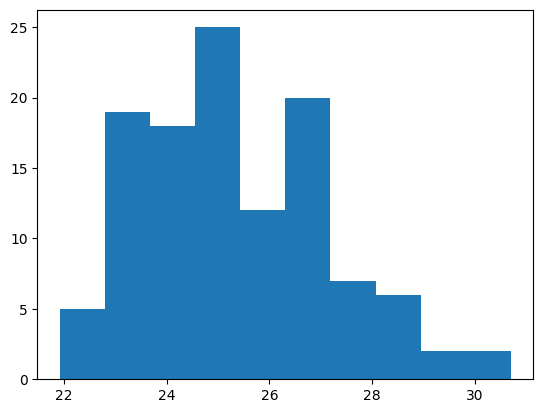

In [72]:
df_merged_2019['GDP'] = np.log(df_merged_2019['GDP'])
plt.hist(df_merged_2019['GDP'])

In [73]:
# plt.figure(figsize=(20, 20))
# sns.pairplot(data=df_features, diag_kind = 'hist', kind = 'scatter', hue="GDP")
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Correlation Among Numerical Features')

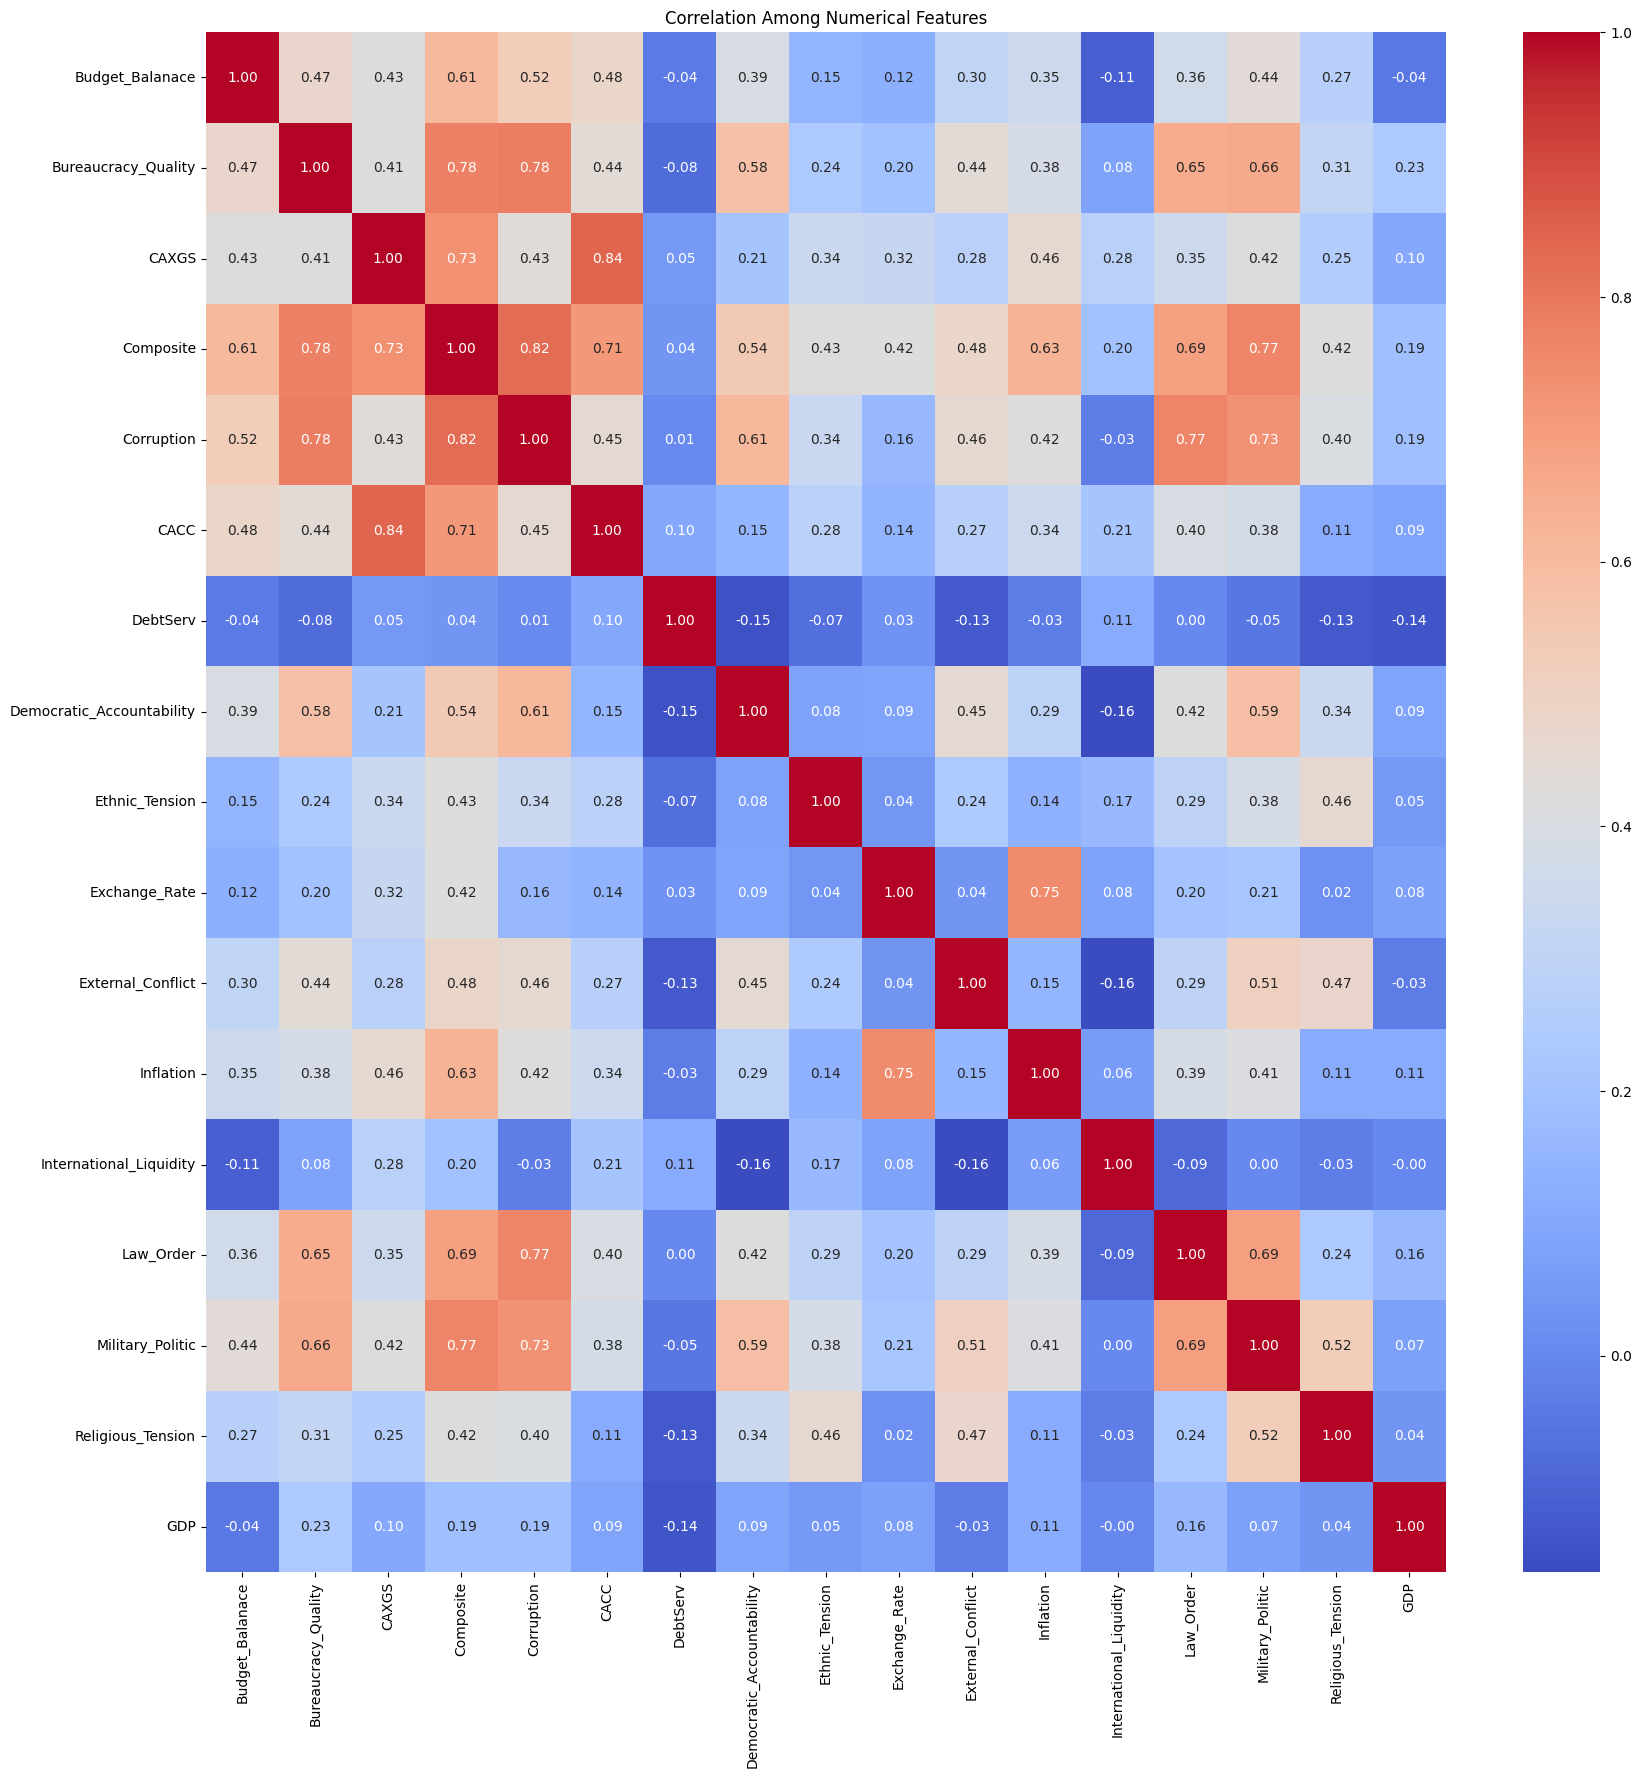

In [74]:
corr_matrix = df_features.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Among Numerical Features")

In [75]:
# 2020 data
df_merged_2020 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2020"]]
    df_temp.rename(columns={"2020":features[i]}, inplace = True)
    df_merged_2020 = pd.merge(df_merged_2020, df_temp, on="Country", how="inner")

# 2021 data
df_merged_2022 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2021"]]
    df_temp.rename(columns={"2021":features[i]}, inplace = True)
    df_merged_2022 = pd.merge(df_merged_2022, df_temp, on="Country", how="inner")

df_merged_2020['GDP'] = np.log(df_merged_2020['GDP'])
df_merged_2022['GDP'] = np.log(df_merged_2022['GDP'])

/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3033831467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2020":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3033831467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2020":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3033831467.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [76]:
df_merged_2019['Year'] = 2019
df_merged_2020['Year'] = 2020
df_merged_2022['Year'] = 2021

df_merged_2019.dropna(inplace=True)
df_merged_2020.dropna(inplace=True)
df_merged_2022.dropna(inplace=True)

df_merged_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [77]:
df_merged_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [78]:
df_merged_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [79]:
filtered_df_2020 = df_merged_2020[df_merged_2020['Country'].isin(df_merged_2022['Country']) &
                                  df_merged_2020['Country'].isin(df_merged_2019['Country'])]
filtered_df_2022 = df_merged_2022[df_merged_2022['Country'].isin(df_merged_2020['Country']) &
                                  df_merged_2022['Country'].isin(df_merged_2019['Country'])]
filtered_df_2019 = df_merged_2019[df_merged_2019['Country'].isin(df_merged_2022['Country']) &
                                  df_merged_2019['Country'].isin(df_merged_2020['Country'])]
# filtered_df_2020.info()
# filtered_df_2021.info()
# filtered_df_2019.info()

In [80]:
# combining all into one dataframe
df_2019_2020_2022 = pd.concat([filtered_df_2019, filtered_df_2020, filtered_df_2022], ignore_index=True)

df_2019_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    345 non-null    object 
 1   Budget_Balanace            345 non-null    float64
 2   Bureaucracy_Quality        345 non-null    float64
 3   CAXGS                      345 non-null    float64
 4   Composite                  345 non-null    float64
 5   Corruption                 345 non-null    float64
 6   CACC                       345 non-null    float64
 7   DebtServ                   345 non-null    float64
 8   Democratic_Accountability  345 non-null    float64
 9   Ethnic_Tension             345 non-null    float64
 10  Exchange_Rate              345 non-null    float64
 11  External_Conflict          345 non-null    float64
 12  Inflation                  345 non-null    float64
 13  International_Liquidity    345 non-null    float64

In [82]:
df_2019_2020_2022.to_stata('data_2019_2020_2022.dta', write_index=False)

## Doing Same Thing but for All years (Looking at relations from 1984 to 2023)

In [28]:
# aha manually reading each csv
df_budget = pd.read_csv("DATA/Budget_balance.csv")
df_burea = pd.read_csv("DATA/Bureaucracy_Quality.csv")
df_CAXGS = pd.read_csv("DATA/CAXGS.csv")
df_comp = pd.read_csv("DATA/Composite.csv")
df_corrup = pd.read_csv("DATA/Corruption.csv")
df_curr_ac = pd.read_csv("DATA/Current_account.csv")
df_debt = pd.read_csv("DATA/Debt_service_risk.csv")
df_demo_ac = pd.read_csv("DATA/Democratic_accountability.csv")
df_ethnic = pd.read_csv("DATA/Ethnic_tension.csv")
df_exch_rat = pd.read_csv("DATA/Exchange_Rate_Stability.csv")
df_external_conf = pd.read_csv("DATA/External_Conflict.csv")
df_for_debt = pd.read_csv("DATA/Foreign_Debt.csv")
# df_gdp_per_cap = pd.read_csv("DATA/GDP_per_capita.csv") # excluded as these are risk indecies
# df_gdp_growth = pd.read_csv("DATA/GDPGrowth.csv") 
df_inflation = pd.read_csv("DATA/Inflation.csv")
df_int_liq = pd.read_csv("DATA/International_Liquidity.csv")
df_law_ord = pd.read_csv("DATA/Law_and_order.csv")
df_mil_pol = pd.read_csv("DATA/Military_in_politics.csv")
df_reli_tension = pd.read_csv("DATA/Religious_tensions.csv")
df_GDP = pd.read_csv("DATA/GDP_data.csv")
df_GDP_per_capita = pd.read_csv("DATA\Country_GDP_Per_capita(Current_USD).csv")
df_GDP_growth = pd.read_csv("DATA\GDP_Growth_Data.csv")
df_population = pd.read_csv("DATA\Population.csv")

In [31]:
# using entire dataset
all_df = [df_budget, df_burea, df_CAXGS, df_comp, df_corrup, df_curr_ac, df_debt, df_demo_ac, df_ethnic,
          df_exch_rat, df_external_conf, df_inflation, df_int_liq, df_law_ord, df_mil_pol, df_reli_tension,
          df_GDP, df_GDP_per_capita, df_GDP_growth, df_population]
features = ["Budget_Balanace", "Bureaucracy_Quality", "CAXGS", "Composite", "Corruption", "CACC", "DebtServ", 
            "Democratic_Accountability", "Ethnic_Tension", "Exchange_Rate", "External_Conflict", "Inflation",
            "International_Liquidity", "Law_Order", "Military_Politic", "Religious_Tension", "GDP", "GDP_Per_Capita", "GDP_Growth", "Population"]

In [ ]:
# getting years of interest
pd.set_option("display.max_rows", None)
df_GDP.isna().sum()


Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              128
1961              124
1962              122
1963              122
1964              122
1965              112
1966              111
1967              108
1968              107
1969              107
1970               85
1971               84
1972               84
1973               84
1974               84
1975               80
1976               80
1977               77
1978               78
1979               77
1980               69
1981               68
1982               66
1983               65
1984               63
1985               61
1986               61
1987               54
1988               50
1989               46
1990               30
1991               30
1992               27
1993               23
1994               22
1995               19
1996               19
1997               19
1998               17
1999               16
2000               15
2001      

In [33]:
df_GDP.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP_per_capita.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP_growth.rename(columns={"Country Name": "Country"}, inplace=True)
df_population.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP.head()

Country Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  2.121696e+10  2.230747e+10  2.370247e+10  2.577938e+10   
2  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
3  NY.GDP.MKTP.CD  1.188413e+10  1.268566e+10  1.360683e+10  1.443998e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2015          2016          2017  \
0           NaN           NaN  ...  2.962907e+09  2.983635e+09  3.092429e+09   
1  2.804954e+10  3.037491e+10  ...  8.992957e+11  8.298300e+11  9.401055e+11   
2           NaN           NaN  ...  1.913422e+10  1.811657e+10  1.875346e+10   
3  1.576911e+10  1.693448e+10  ...  7.693673e+11  6.921811e+11  6.857502e+11   
4           NaN           NaN  ...  9.049642e+10  5.276162e+10  7.369015e+10   

           2018          2019          2020          2021          2022  \
0  3.276184e+09  3.395799e+09  2.558906e+09  3.103184e+09  3.544708e+09   
1  1.012719e+12  1.006527e+12  9.290741e+11  1.086772e+12  1.183962e+12   
2  1.805322e+10  1.879944e+10  1.995593e+10  1.426650e+10  1.450216e+10   
3  7.681896e+11  8.239336e+11  7.871467e+11  8.459930e+11  8.771408e+11   
4  7.945069e+10  7.089796e+10  4.850156e+10  6.650513e+10  1.043997e+11   

           2023  Unnamed: 68  
0           NaN          NaN  
1  1.236163e+12          NaN  
2           NaN          NaN  
3  7.965862e+11          NaN  
4  8.472296e+10          NaN  

[5 rows x 69 columns]

In [34]:
# making list with all the data for a given year
df_list = []
for year in range(1984, 2023):
    df_GDP_temp = df_GDP[["Country", str(year)]].copy()
    df_GDP_temp.rename(columns={str(year): "GDP"}, inplace=True)

    # Start with df_GDP_temp for merging
    df_merged = df_GDP_temp.copy()

    # Merge with each DataFrame in all_df for the current year
    for i in range(len(all_df)):
        df_temp = all_df[i][["Country", str(year)]].copy()
        df_temp.rename(columns={str(year): features[i]}, inplace=True)

        # Merge progressively
        df_merged = pd.merge(df_merged, df_temp, on="Country", how="inner")

    # Add the 'Year' column
    df_merged['Year'] = year

    # Append the final merged DataFrame for the current year
    df_list.append(df_merged)

# Optionally concatenate all yearly DataFrames into one DataFrame
final_df = pd.concat(df_list, ignore_index=True)

final_df.head()

Country         GDP_x  Budget_Balanace Bureaucracy_Quality  CAXGS  \
0     Angola           NaN             5.00                 2.0    NaN   
1    Albania  1.857338e+09             4.17                 1.0    NaN   
2  Argentina  1.129886e+11             2.78                 2.0  10.33   
3    Armenia           NaN              NaN                 NaN    NaN   
4  Australia  1.935190e+11             7.50                 4.0  10.54   

   Composite Corruption   CACC  DebtServ Democratic_Accountability  ...  \
0        NaN        3.0   7.50       NaN                       2.0  ...   
1        NaN        4.0   6.25       NaN                       4.0  ...   
2      38.46       3.67   4.17       0.0                      3.67  ...   
3        NaN        NaN    NaN       NaN                       NaN  ...   
4      84.04        5.0  11.25       8.0                       6.0  ...   

  Inflation  International_Liquidity Law_Order  Military_Politic  \
0       NaN                      NaN       2.0               3.0   
1       NaN                      NaN      4.67               5.0   
2       0.0                     0.42       3.0              3.33   
3       NaN                      NaN       NaN               NaN   
4       8.0                     2.83       6.0               6.0   

   Religious_Tension         GDP_y GDP_Per_Capita GDP_Growth  Population  Year  
0                5.0           NaN            NaN   6.000002   9617702.0  1984  
1                6.0  1.857338e+09     639.484730  -1.251597   2904429.0  1984  
2                5.0  1.129886e+11    3787.470679   1.570739  29832197.0  1984  
3                NaN           NaN            NaN        NaN   3272102.0  1984  
4                6.0  1.935190e+11   12421.473867   4.591711  15579391.0  1984  

[5 rows x 23 columns]

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602 entries, 0 to 4601
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4602 non-null   object 
 1   GDP_x                      4487 non-null   float64
 2   Budget_Balanace            4360 non-null   float64
 3   Bureaucracy_Quality        4358 non-null   object 
 4   CAXGS                      4272 non-null   float64
 5   Composite                  4331 non-null   float64
 6   Corruption                 4358 non-null   object 
 7   CACC                       4358 non-null   float64
 8   DebtServ                   4123 non-null   float64
 9   Democratic_Accountability  4358 non-null   object 
 10  Ethnic_Tension             4358 non-null   object 
 11  Exchange_Rate              4365 non-null   float64
 12  External_Conflict          4358 non-null   object 
 13  Inflation                  4261 non-null   float

In [36]:
final_df.describe()

GDP_x  Budget_Balanace        CAXGS    Composite         CACC  \
count  4.487000e+03      4360.000000  4272.000000  4331.000000  4358.000000   
mean   3.878531e+11         5.668438    11.030798    66.728518     9.561721   
std    1.549591e+12         1.739516     2.638736    12.954055     2.892075   
min    1.322000e+08         0.000000     0.000000    13.040000     0.000000   
25%    9.002714e+09         4.510000    10.290000    59.355000     7.735000   
50%    3.493631e+10         5.750000    11.500000    67.540000    10.000000   
75%    1.812764e+11         6.710000    12.420000    75.980000    11.330000   
max    2.574411e+13        10.000000    95.790000    95.420000    15.000000   

          DebtServ  Exchange_Rate    Inflation  International_Liquidity  \
count  4123.000000    4365.000000  4261.000000              4229.000000   
mean      8.300956       8.075723     7.789575                 1.966628   
std       1.722887       2.295968     2.224543                 1.514469   
min       0.000000       0.000000     0.000000                 0.000000   
25%       7.500000       6.920000     7.000000                 0.540000   
50%       8.710000       9.130000     8.500000                 1.920000   
75%       9.580000       9.920000     9.460000                 3.290000   
max      13.290000      10.000000    10.000000                 7.000000   

              GDP_y  GDP_Per_Capita   GDP_Growth    Population         Year  
count  4.487000e+03     4487.000000  4495.000000  4.602000e+03  4602.000000  
mean   3.878531e+11    11697.200169     3.374567  4.666997e+07  2003.000000  
std    1.549591e+12    17725.839060     6.649979  1.583181e+08    11.255852  
min    1.322000e+08       22.850371   -64.047107  1.516500e+05  1984.000000  
25%    9.002714e+09      982.279283     1.400005  4.179376e+06  1993.000000  
50%    3.493631e+10     3690.756778     3.625449  1.019542e+07  2003.000000  
75%    1.812764e+11    15007.902550     5.797792  3.015412e+07  2013.000000  
max    2.574411e+13   133711.794436   153.492641  1.417173e+09  2022.000000

In [37]:
final_df.rename(columns={"GDP_x": "GDP"}, inplace=True)
final_df.drop(columns=["GDP_y"])

Country           GDP  Budget_Balanace Bureaucracy_Quality  \
0                 Angola           NaN             5.00                 2.0   
1                Albania  1.857338e+09             4.17                 1.0   
2              Argentina  1.129886e+11             2.78                 2.0   
3                Armenia           NaN              NaN                 NaN   
4              Australia  1.935190e+11             7.50                 4.0   
5                Austria  6.798534e+10             8.47                 3.5   
6             Azerbaijan           NaN              NaN                 NaN   
7                Belgium  8.334953e+10             8.27                 4.0   
8           Burkina Faso  1.459880e+09              NaN                 NaN   
9             Bangladesh  1.892084e+10             4.72                 0.0   
10              Bulgaria  1.759494e+10             7.36                 2.0   
11               Bahrain  4.440875e+09             5.70                 3.0   
12               Belarus           NaN              NaN                 NaN   
13               Bolivia  6.169304e+09             2.78                 0.0   
14                Brazil           NaN             3.33                 3.0   
15              Botswana  1.240822e+09              NaN                 NaN   
16                Canada  3.567184e+11             8.20                 4.0   
17           Switzerland  1.094553e+11             9.17                 4.0   
18                 Chile  1.967177e+10             2.22                2.58   
19                 China  2.599465e+11             7.14                1.86   
20         Cote d'Ivoire  6.841639e+09             5.28                 3.0   
21              Cameroon  7.311938e+09             5.35                2.42   
22              Colombia  3.825312e+10             6.53                 3.0   
23            Costa Rica  3.660478e+09             4.58                 2.0   
24                  Cuba  2.403938e+10              NaN                 NaN   
25                Cyprus  2.278249e+09              NaN                 NaN   
26               Germany  7.251111e+11              NaN                 NaN   
27               Denmark  5.910524e+10             7.29                 4.0   
28    Dominican Republic  1.159400e+10             3.61                 2.0   
29               Algeria  5.369855e+10             6.18                 1.0   
30               Ecuador  1.691251e+10             4.03                 2.0   
31                 Spain  1.721029e+11             7.50                 3.0   
32               Estonia           NaN              NaN                 NaN   
33              Ethiopia  8.298310e+09              NaN                 NaN   
34               Finland  5.288880e+10             8.61                 4.0   
35                France  5.306838e+11             5.56                 4.0   
36                 Gabon  3.561452e+09             5.90                1.67   
37        United Kingdom  4.614871e+11             7.08                 4.0   
38                 Ghana  4.412280e+09             1.88                 0.0   
39                Guinea  1.842150e+10             2.60                 0.0   
40                Greece  4.802002e+10             4.17                 2.0   
41             Guatemala  9.470000e+09             4.58                 0.0   
42                Guyana  4.376316e+08             3.33                 0.0   
43              Honduras  4.915312e+09             4.51                 0.0   
44               Croatia           NaN              NaN                 NaN   
45                 Haiti  1.816200e+09             3.33                 0.0   
46               Hungary  2.117343e+10             7.50                 3.0   
47             Indonesia  8.485370e+10             5.42                 0.0   
48                 India  2.121576e+11             5.42                2.42   
49               Ireland  2.010665e+10             6.95            

In [ ]:
final_df.to_stata('df_all_features.dta', write_index=False)
final_df.to_csv('df_all_features.csv', write_index=False)